<a href="https://colab.research.google.com/github/ras-internship/colabs/blob/main/Alim%20Fedoseev/prophet_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from prophet import Prophet

In [8]:
df = pd.read_excel('https://github.com/ras-internship/data/blob/main/vvp-infl.xlsx?raw=true')
df.head()

,Date,infl,VVP
0,1995-01-01,118.0,395.54
1,1995-02-01,111.0,395.54
2,1995-03-01,109.0,395.54
3,1995-04-01,108.5,395.54
4,1995-05-01,107.9,395.54


In [9]:
df.tail()

,Date,infl,VVP
331,2022-08-01,99.5,2 130.01
332,2022-09-01,100.1,2 130.02
333,2022-10-01,100.2,2 130.03
334,2022-11-01,100.4,2 130.04
335,2022-12-01,100.8,2 130.05


In [41]:
df_infl = df.iloc[:-10, [0, 1]].copy()
df_infl.columns = ['ds', 'y']
df_infl


,ds,y
0,1995-01-01,118.0
1,1995-02-01,111.0
2,1995-03-01,109.0
3,1995-04-01,108.5
4,1995-05-01,107.9
...,...,...
321,2021-10-01,101.1
322,2021-11-01,101.0
323,2021-12-01,100.8
324,2022-01-01,101.0


In [35]:
m = Prophet()
m.fit(df_infl)
future = m.make_future_dataframe(periods=10, freq='M')
future.tail(11)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfr7in64/k1r3gcel.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfr7in64/tsd1ke9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52925', 'data', 'file=/tmp/tmpdfr7in64/k1r3gcel.json', 'init=/tmp/tmpdfr7in64/tsd1ke9t.json', 'output', 'file=/tmp/tmpdfr7in64/prophet_modelc2cl5dhs/prophet_model-20230407123726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
325,2022-02-01
326,2022-02-28
327,2022-03-31
328,2022-04-30
329,2022-05-31
330,2022-06-30
331,2022-07-31
332,2022-08-31
333,2022-09-30
334,2022-10-31


In [42]:
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

            ds        yhat  yhat_lower  yhat_upper
326 2022-02-28  100.692920   97.783036  103.964209
327 2022-03-31  100.501846   97.667265  103.434889
328 2022-04-30  100.264993   97.285411  103.315409
329 2022-05-31   99.371928   96.405430  102.325024
330 2022-06-30   99.491248   96.529734  102.365286
331 2022-07-31   99.197557   95.927582  102.384163
332 2022-08-31  102.858566   99.890011  105.810675
333 2022-09-30   99.500437   96.481563  102.483030
334 2022-10-31   99.763651   96.792286  102.933902
335 2022-11-30  100.492123   97.453511  103.533905


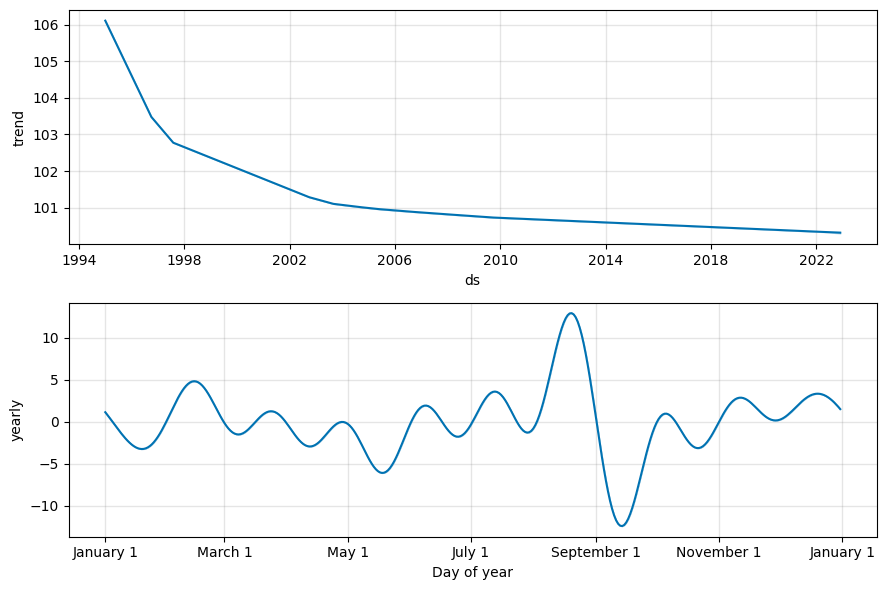

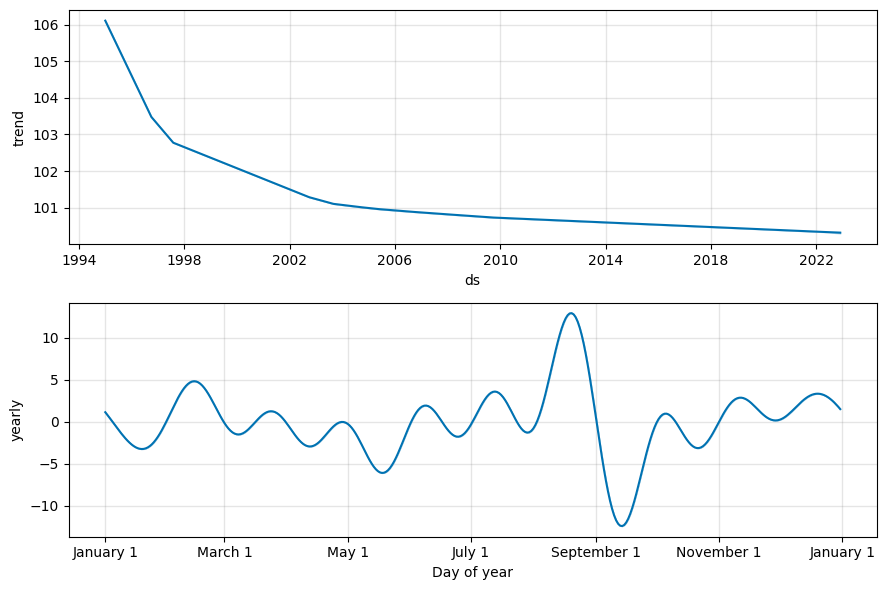

In [44]:
m.plot_components(forecast)
